In [1]:
import cv2
import imageio 
import matplotlib.pyplot as plt

In [17]:
img = imageio.imread('floor.jpg')
img.shape

(6000, 4000, 3)

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [19]:
img.shape

(6000, 4000)

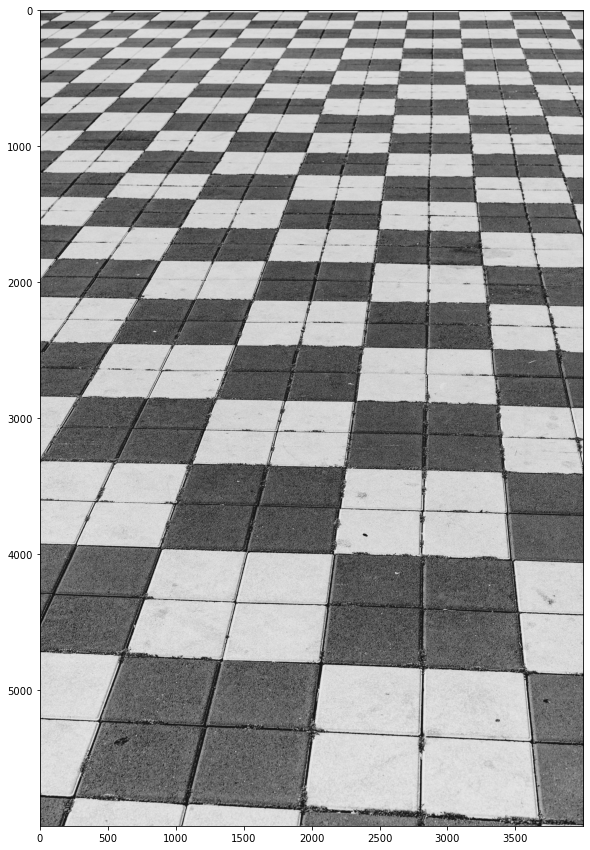

In [23]:
f = plt.figure()
f.set_size_inches((15, 15))
plt.imshow(img, cmap='gray')
plt.show()

In [25]:
imageio.imwrite('floor_image.bmp', img)

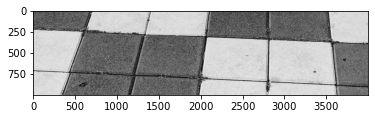

In [26]:
roi_img = img[4500:5500, :]
plt.imshow(roi_img, cmap='gray')
plt.show()

In [27]:
roi_img.shape

(1000, 4000)

In [29]:
num_measure_regions = 20
measure_width = roi_img.shape[1] // num_measure_regions
print(f"Number of measure regions  { num_measure_regions } and each of the measure_region is of size {measure_width}")

Number of measure regions  20 and each of the measure_region is of size 200


In [30]:
import numpy as np

In [50]:
profiles = []
for reg in np.array_split(roi_img, num_measure_regions, axis=1):
    profile = np.sum(reg, axis=1) / reg.shape[1]
    profiles.append(profile)

In [51]:
print(f'Number of profiles {len(profiles)}')
print(f'Shape of profile {profiles[0].shape}')

Number of profiles 20
Shape of profile (1000,)


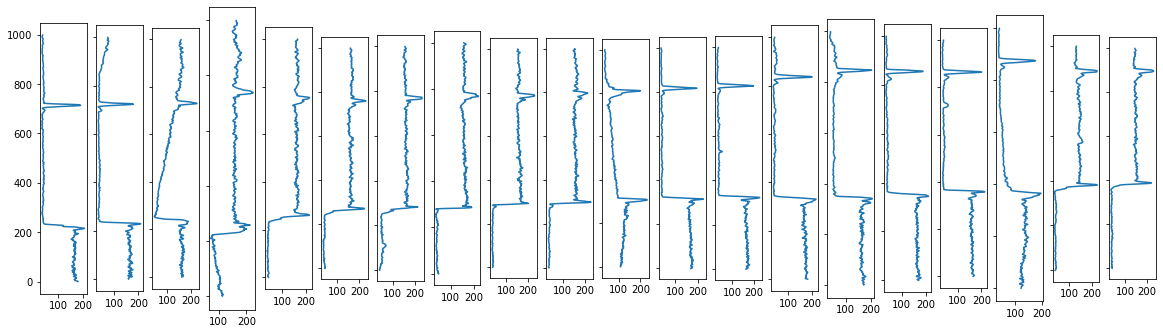

In [65]:
_, axes = plt.subplots(1, 20, figsize=(20, 30), sharey=True)
for idx, ax in enumerate(axes.flatten()):
    ax.plot(255 - profiles[idx], np.arange(profiles[idx].shape[0]))
    ax.set_aspect('equal')
plt.show()